In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ttest_ind, chi2_contingency


In [34]:
data = pd.read_csv('statistic.csv')

male_data = data[data['Sex'] == 'М']
female_data = data[data['Sex'] == 'Ж']
t_statistic, p_value = ttest_ind(male_data['Num_sick_days']>2, female_data['Num_sick_days']>2)
if p_value < 0.05:
    print("Мужчины пропускают значимо чаще женщин.")
else:
    print("Нет значимой разницы в количестве пропусков между мужчинами и женщинами.")


Нет значимой разницы в количестве пропусков между мужчинами и женщинами.


In [44]:
num_sick_days = 2
male_data = data[data['Sex'] == 'М']
male_data = male_data[male_data['Num_sick_days']>num_sick_days]
print(male_data['Num_sick_days'])

1      4
2      4
3      5
4      4
5      4
      ..
227    3
228    3
229    5
232    5
236    3
Name: Num_sick_days, Length: 84, dtype: int64


In [36]:
young_data = data[data['Age'] <= 35]
old_data = data[data['Age'] > 35]
cross_table = pd.crosstab(data['Age'] > 35, data['Num_sick_days'] > 2)
# Проверка второй гипотезы с использованием хи-квадрат теста
chi2, p_value, _, _ = chi2_contingency(cross_table)
if p_value < 0.05:
    print("Сотрудники старше 35 лет пропускают значимо чаще своих более молодых коллег.")
else:
    print("Нет значимой разницы в количестве пропусков между сотрудниками старше 35 лет и их более молодыми коллегами.")

Num_sick_days  False  True
Age                       
False             21    36
True              65   115
Нет значимой разницы в количестве пропусков между сотрудниками старше 35 лет и их более молодыми коллегами.


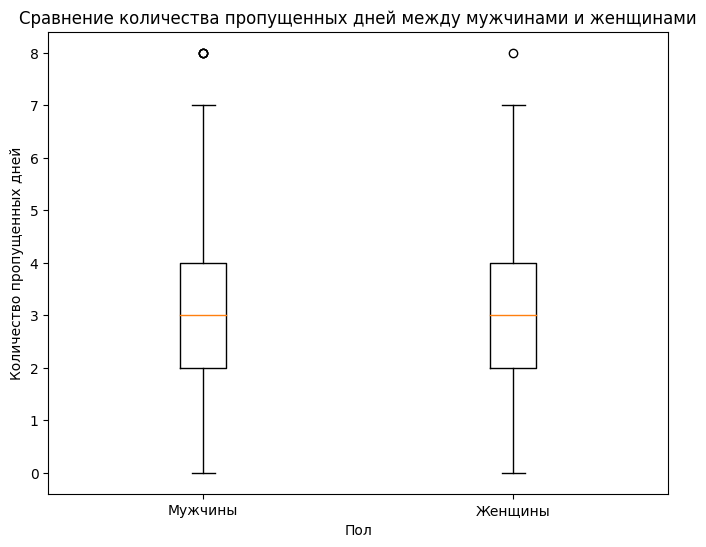

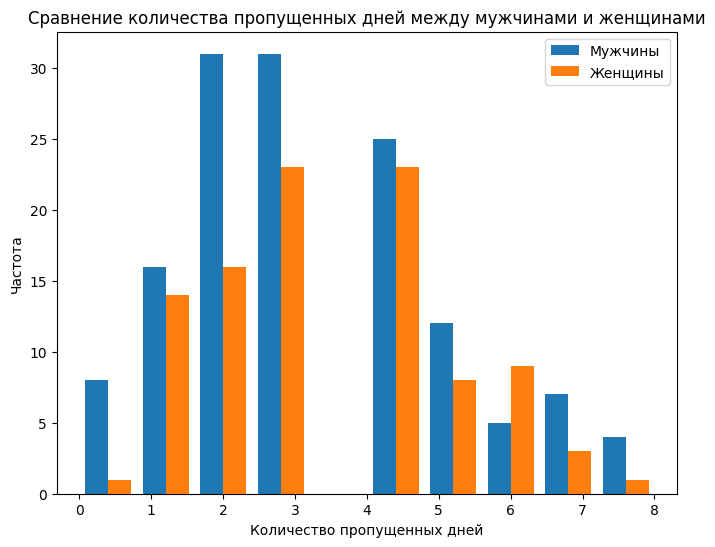

In [31]:
plt.figure(figsize=(8, 6))
plt.boxplot([male_data['Num_sick_days'], female_data['Num_sick_days']], labels=['Мужчины', 'Женщины'])
plt.xlabel('Пол')
plt.ylabel('Количество пропущенных дней')
plt.title('Сравнение количества пропущенных дней между мужчинами и женщинами')
plt.show()
plt.figure(figsize=(8, 6))
plt.hist([male_data['Num_sick_days'], female_data['Num_sick_days']], bins=10, label=['Мужчины', 'Женщины'])
plt.xlabel('Количество пропущенных дней')
plt.ylabel('Частота')
plt.title('Сравнение количества пропущенных дней между мужчинами и женщинами')
plt.legend()
plt.show()

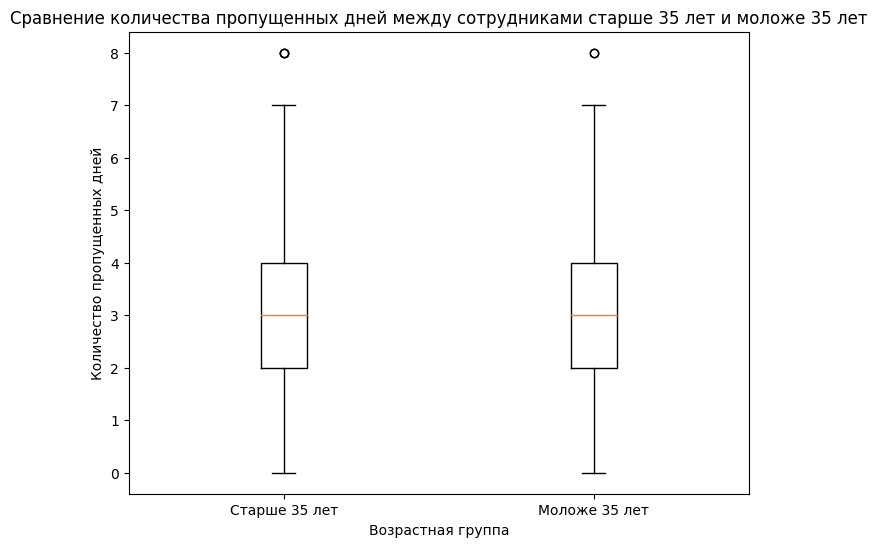

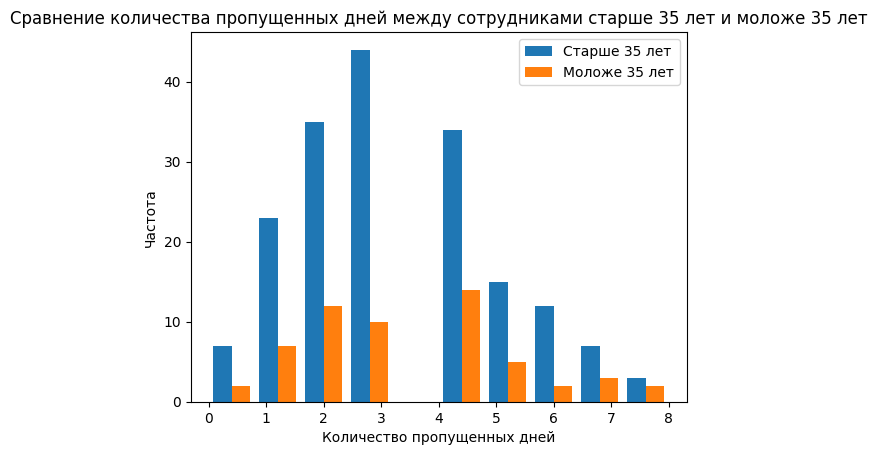

In [32]:
plt.figure(figsize=(8, 6))
plt.boxplot([old_data['Num_sick_days'], young_data['Num_sick_days']], labels=['Старше 35 лет', 'Моложе 35 лет'])
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пропущенных дней')
plt.title('Сравнение количества пропущенных дней между сотрудниками старше 35 лет и моложе 35 лет')
plt.show()
plt.hist([old_data['Num_sick_days'], young_data['Num_sick_days']], bins=10, label=['Старше 35 лет', 'Моложе 35 лет'])
plt.xlabel('Количество пропущенных дней')
plt.ylabel('Частота')
plt.title('Сравнение количества пропущенных дней между сотрудниками старше 35 лет и моложе 35 лет')
plt.legend()
plt.show()